## Loan Application Status Prediction

#### Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

#### Independent Variables: 

1.	```Loan_ID -``` This refer to the unique identifier of the applicant's affirmed purchases
2.	```Gender -``` This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	```Married -``` This refers to applicant being in a state of matrimony
4.	```Dependents -``` This refres to persons who depends on the applicants for survival
5.	```Education -``` This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	```Self_Employed -``` This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	```Applicant Income -``` This refers to disposable income available for the applicant's use under State law.
8.	```CoapplicantIncome -``` This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	```Loan_Amount -``` This refers to the amount of money an applicant owe at any given time.
10.	```Loan_Amount_Term -``` This refers to the duaration in which the loan is availed to the applicant
11.	```Credit History -``` This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	```Property_Area -``` This refers to the total area within the boundaries of the property as set out in Schedule.
13.	```Loan_Status -``` This refres to whether applicant is eligible to be availed the Loan requested.

**You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset.**

###### Dataset Link-  https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv


### Importing Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import power_transform
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import joblib

### Loading Data

In [2]:
df = pd.read_csv("loan_application.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### EDA(Exploratory Data Analysis)

In [4]:
#checking the shape of dataset
print("There are {} rows and {} columns respectively present in the dataset.".format(*df.shape))

There are 614 rows and 13 columns respectively present in the dataset.


In [5]:
# checking columns in Dataset
print("These are the columns present in the dataset:  \n\n",df.columns)

These are the columns present in the dataset:  

 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [6]:
# checking duplicate values in the dataset
print("There are {} duplicates present in the dataset".format(df.duplicated().sum()))

There are 0 duplicates present in the dataset


In [7]:
# checking null values in the dataset
print("There are {} Nulls present in the dataset".format(df.isnull().sum().sum()))

There are 149 Nulls present in the dataset


In [8]:
# Checking Null Values in Columns
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

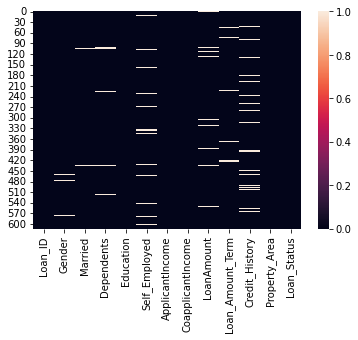

In [9]:
# Heatmap of null values
sns.heatmap(df.isnull())

##### Data Quality Observation

Upon examining the dataset, the following observations can be made regarding missing values in each column:

- **Loan_ID**: No missing values.
- **Gender**: 13 missing values.
- **Married**: 3 missing values.
- **Dependents**: 15 missing values.
- **Education**: No missing values.
- **Self_Employed**: 32 missing values.
- **ApplicantIncome**: No missing values.
- **CoapplicantIncome**: No missing values.
- **LoanAmount**: 22 missing values.
- **Loan_Amount_Term**: 14 missing values.
- **Credit_History**: 50 missing values.
- **Property_Area**: No missing values.
- **Loan_Status**: No missing values.

It's important to address these missing values appropriately before proceeding with any data analysis or modeling tasks.


In [10]:
# checking information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


##### Dataset Information Observation

Upon reviewing the dataset information, the following important observations can be made:

- The dataset contains a total of 614 entries (rows).
- There are 13 columns in the dataset, representing various features.
- The columns have different data types:
  - 8 columns are of object data type (categorical variables).
  - 4 columns are of float64 data type (numerical variables).
  - 1 column is of int64 data type (numerical variable).
- Some columns have missing values:
  - 'Dependents' has 15 missing values.
  - 'Self_Employed' has 32 missing values.
  - 'LoanAmount' has 22 missing values.
  - 'Loan_Amount_Term' has 14 missing values.
  - 'Credit_History' has 50 missing values.
- The 'Loan_Status' column appears to be the target variable for the analysis, representing the loan approval status.

These observations highlight the need for data preprocessing, including handling missing values and potentially converting categorical variables into a suitable format for analysis and modeling.


In [11]:
# checking number of unique values in each column
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

##### Unique Values Observation

Upon analyzing the number of unique values in each column, the following important observations can be made:

- **Loan_ID**: There are 614 unique loan IDs, indicating no duplicate entries in this column.
- **Gender**: There are 2 unique values, indicating the gender of applicants.
- **Married**: There are 2 unique values, indicating whether applicants are married or not.
- **Dependents**: There are 4 unique values, representing the number of dependents of applicants.
- **Education**: There are 2 unique values, indicating the education level of applicants.
- **Self_Employed**: There are 2 unique values, indicating whether applicants are self-employed or not.
- **ApplicantIncome**: There are 505 unique values, representing the income of applicants.
- **CoapplicantIncome**: There are 287 unique values, representing the income of coapplicants.
- **LoanAmount**: There are 203 unique values, representing the loan amount applied for.
- **Loan_Amount_Term**: There are 10 unique values, representing the term (in months) of the loan amount.
- **Credit_History**: There are 2 unique values, indicating the credit history of applicants.
- **Property_Area**: There are 3 unique values, representing the property area of applicants.
- **Loan_Status**: There are 2 unique values, indicating whether the loan was approved or not.

These unique value counts provide insight into the diversity and distribution of data within each column, which can be valuable for understanding the dataset's characteristics and potential patterns.


##### value Counts

In [12]:
for i in df.columns:
    print(df[i].value_counts())
    print('*'*50)

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
**************************************************
Male      489
Female    112
Name: Gender, dtype: int64
**************************************************
Yes    398
No     213
Name: Married, dtype: int64
**************************************************
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
**************************************************
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
**************************************************
No     500
Yes     82
Name: Self_Employed, dtype: int64
**************************************************
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
**************************************

Observations:

In the ```"Dependents"``` column, there is a category labeled as ```"3+"```. To maintain consistency and clarity, we will update this category to ```"3"``` which represents the maximum number of dependents.

Additionally, certain columns with ```float``` values have decimal points followed by only zeros. To enhance data integrity and facilitate analysis, we will convert these float values into integers.

##### Replace "3+" with "3" in the Dependents column

In [13]:
# Replace "3+" with "3" in the Dependents column
df['Dependents'] = df['Dependents'].replace('3+', '3')

# Verify the changes
print(df['Dependents'].value_counts())

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64


In [14]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Filling Null values

In [15]:
# Imputation techniques
impute_techniques = {
    'Gender':'mode',
    'Married':'mode',
    'Dependents':'mode',
    'Self_Employed':'mode',
    'LoanAmount':'median',
    'Loan_Amount_Term':'median',
    'Credit_History':'mode'
}
    
# Impute based on defined techniques
for column, technique in impute_techniques.items():
    if technique == 'mode':
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)
    elif technique == 'mean':
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
    elif technique == 'median':
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)

df.sample(5)    

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
494,LP002585,Male,Yes,0,Graduate,No,3597,2157.0,119.0,360.0,0.0,Rural,N
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,128.0,360.0,1.0,Urban,Y
118,LP001421,Male,Yes,0,Graduate,No,5568,2142.0,175.0,360.0,1.0,Rural,N
310,LP002002,Female,No,0,Graduate,No,2917,0.0,84.0,360.0,1.0,Semiurban,Y
375,LP002211,Male,Yes,0,Graduate,No,4817,923.0,120.0,180.0,1.0,Urban,Y


<AxesSubplot:>

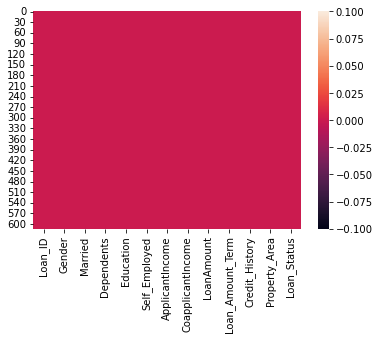

In [16]:
sns.heatmap(df.isnull())

Now i have imputed all the null values

In [17]:
# Convert selected float columns to integers
int_columns = ['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for column in int_columns:
    df[column] = df[column].astype(int)

# Verify the changes
print(df.dtypes)


Loan_ID              object
Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
ApplicantIncome       int64
CoapplicantIncome     int32
LoanAmount            int32
Loan_Amount_Term      int32
Credit_History        int32
Property_Area        object
Loan_Status          object
dtype: object


In [18]:
## checking info after handling null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            614 non-null    object
 1   Gender             614 non-null    object
 2   Married            614 non-null    object
 3   Dependents         614 non-null    object
 4   Education          614 non-null    object
 5   Self_Employed      614 non-null    object
 6   ApplicantIncome    614 non-null    int64 
 7   CoapplicantIncome  614 non-null    int32 
 8   LoanAmount         614 non-null    int32 
 9   Loan_Amount_Term   614 non-null    int32 
 10  Credit_History     614 non-null    int32 
 11  Property_Area      614 non-null    object
 12  Loan_Status        614 non-null    object
dtypes: int32(4), int64(1), object(8)
memory usage: 52.9+ KB


In [19]:
# Statistical Understanding
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.00000,614.000000,614.000000,614.000000
mean,5403.459283,1621.24430,145.752443,342.410423,0.855049
std,6109.041673,2926.24876,84.107233,64.428629,0.352339
min,150.000000,0.00000,9.000000,12.000000,0.000000
25%,2877.500000,0.00000,100.250000,360.000000,1.000000
50%,3812.500000,1188.50000,128.000000,360.000000,1.000000
75%,5795.000000,2297.25000,164.750000,360.000000,1.000000
max,81000.000000,41667.00000,700.000000,480.000000,1.000000


##### Summary Statistics Observation

Upon analyzing the summary statistics of the dataset using the `describe()` function, we can make the following important observations:

- **ApplicantIncome**: The average applicant income is approximately 5403, with a wide range of incomes from 150 to 81000. The data is characterized by relatively high variability, as indicated by the standard deviation of 6109.

- **CoapplicantIncome**: The average coapplicant income is approximately 1621, with values ranging from 0 to 41667. Similar to applicant income, this column also exhibits significant variability (standard deviation of 2926).

- **LoanAmount**: The average loan amount applied for is approximately 146, with values ranging from 9 to 700. The standard deviation is approximately 84, indicating variability in loan amounts.

- **Loan_Amount_Term**: The majority of loan applicants (75%) have a loan amount term of 360 months (30 years), with some variability around this value. The range of terms is from 12 months to 480 months.

- **Credit_History**: The majority of applicants (approximately 86%) have a credit history of 1 (good credit), while around 14% have a credit history of 0 (poor credit or no credit history).

These summary statistics provide insights into the central tendency, spread, and distribution of numerical variables in the dataset. The wide ranges and variabilities in applicant income, coapplicant income, and loan amount suggest diversity in the financial profiles of loan applicants. Additionally, the high percentage of applicants with good credit history is noteworthy and may play a significant role in loan approval decisions.


In [20]:
#Checking Skewness
skewness = df.skew()
skewness

Dependents           1.015551
ApplicantIncome      6.539513
CoapplicantIncome    7.491530
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

##### Skewness Observation

Upon calculating the skewness of the numerical columns in the dataset, the following important observations can be made:

- **Dependents**: The 'Dependents' column exhibits a skewness of approximately 1.02, indicating a moderate positive skewness. This suggests that there is a slight tail on the right side of the distribution.

- **ApplicantIncome**: The 'ApplicantIncome' column shows a high positive skewness of approximately 6.54. This suggests that the distribution is heavily skewed to the right, indicating a long tail of higher income values.

- **CoapplicantIncome**: The 'CoapplicantIncome' column displays a significant positive skewness of around 7.49, indicating a pronounced right skewness in the data distribution.

- **LoanAmount**: The 'LoanAmount' column has a skewness of approximately 2.74, indicating a moderate positive skewness. This suggests that the distribution of loan amounts has a longer tail on the right side.

- **Loan_Amount_Term**: The 'Loan_Amount_Term' column has a skewness of approximately -2.40, indicating a moderate negative skewness. This suggests that the distribution is skewed towards shorter loan terms.

- **Credit_History**: The 'Credit_History' column displays a skewness of approximately -2.02, indicating a moderate negative skewness. This suggests that there is a tail on the left side of the distribution, potentially indicating a higher frequency of good credit histories.

These skewness values provide insights into the distributional characteristics of the numerical columns, helping to identify potential data distribution asymmetry and tail behavior.


### Taking Insigts By Visualizing The Data

#### Loan_ID

In [21]:
df['Loan_ID'].value_counts()

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

This column appears to be an identifier and may not contribute significantly to the prediction. Therefore, I intend to delete this column

In [22]:
df.drop('Loan_ID',axis=1,inplace=True)

### Gender

In [23]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

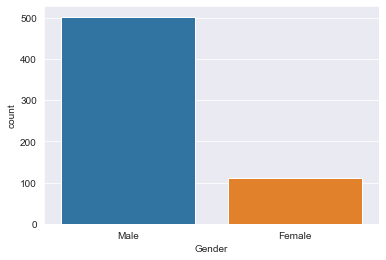

In [24]:
sns.set_style('darkgrid')
sns.countplot(x='Gender', data=df)

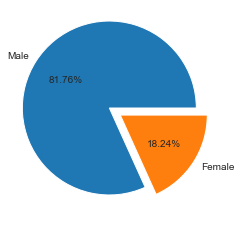

In [25]:
plt.pie(df['Gender'].value_counts().values,labels=df['Gender'].value_counts().index,autopct='%1.2f%%',explode=(.15,0));

In [26]:
df.groupby('Gender')['Loan_Status'].value_counts()

Gender  Loan_Status
Female  Y               75
        N               37
Male    Y              347
        N              155
Name: Loan_Status, dtype: int64

**Gender and Loan Status Observation:**
    
Analyzing the distribution of loan status based on gender, we make the following important observation:

The dataset reveals that the majority of approved loans ('Y') are for males, with 347 approvals compared to 155 rejections. For females, there are 75 loan approvals and 37 rejections. This observation suggests that a higher proportion of males have been approved for loans compared to females.

This gender-based analysis provides insight into the potential influence of gender on loan approval rates within the dataset. Further investigation could explore the factors contributing to this discrepancy in loan approval between genders.

### Married

In [27]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

<AxesSubplot:xlabel='Married', ylabel='count'>

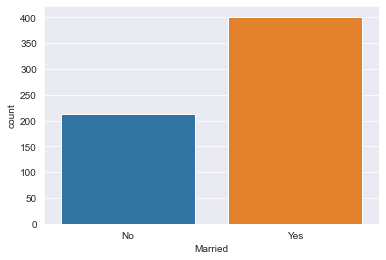

In [28]:
sns.set_style('darkgrid')
sns.countplot(x='Married', data=df)

In [29]:
df.groupby('Married')['Loan_Status'].value_counts()

Married  Loan_Status
No       Y              134
         N               79
Yes      Y              288
         N              113
Name: Loan_Status, dtype: int64

#### Marital Status and Loan Status Observation:

Analyzing the distribution of loan status based on marital status, we make the following important observation:

Among applicants who are not married, 134 loans have been approved ('Y') and 79 loans have been rejected ('N'). On the other hand, among married applicants, 288 loans have been approved and 113 loans have been rejected. This observation suggests that a higher proportion of married individuals have been approved for loans compared to those who are not married.

This marital status-based analysis provides insight into the potential influence of marital status on loan approval rates within the dataset. Further investigation could explore the underlying factors contributing to this difference in loan approval between married and unmarried individuals.

### Dependents

In [30]:
df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

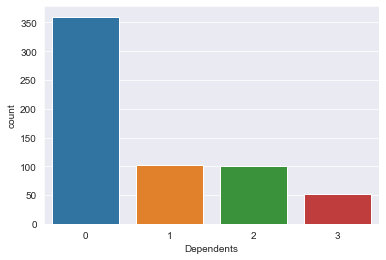

In [31]:
sns.set_style('darkgrid')
sns.countplot(x='Dependents', data=df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

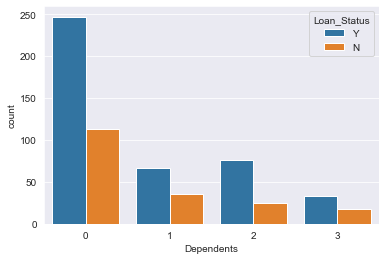

In [32]:
sns.countplot('Dependents',hue='Loan_Status',data=df)

In [33]:
df.groupby('Dependents')['Loan_Status'].value_counts()

Dependents  Loan_Status
0           Y              247
            N              113
1           Y               66
            N               36
2           Y               76
            N               25
3           Y               33
            N               18
Name: Loan_Status, dtype: int64

##### Dependents and Loan Status Observation:

Analyzing the distribution of loan status based on the number of dependents, we make the following important observation:

Applicants with 0 dependents: Among applicants with no dependents, 247 loans have been approved ('Y'), while 113 loans have been rejected ('N'). This indicates a higher approval rate for applicants with no dependents.

Applicants with 1 dependent: Among applicants with one dependent, 66 loans have been approved, and 36 loans have been rejected.

Applicants with 2 dependents: Among applicants with two dependents, 76 loans have been approved, and 25 loans have been rejected.

Applicants with 3 dependents: Among applicants with three dependents, 33 loans have been approved, and 18 loans have been rejected.

This observation suggests that applicants with 0 dependents tend to have a higher loan approval rate compared to those with dependents. The trend in loan approval rates appears to decrease as the number of dependents increases.

Further analysis could delve into the potential reasons behind this trend and explore the impact of the number of dependents on loan approval decisions.

### Education

In [34]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

<AxesSubplot:xlabel='Education', ylabel='count'>

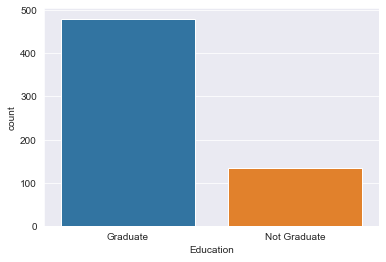

In [35]:
sns.set_style('darkgrid')
sns.countplot(x='Education', data=df)

<AxesSubplot:xlabel='Education', ylabel='count'>

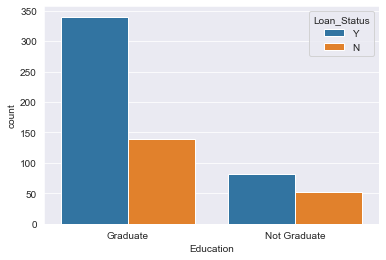

In [36]:
sns.countplot('Education',hue='Loan_Status',data=df)

In [37]:
df.groupby('Education')['Loan_Status'].value_counts()

Education     Loan_Status
Graduate      Y              340
              N              140
Not Graduate  Y               82
              N               52
Name: Loan_Status, dtype: int64

##### Education and Loan Status Observation

Examining the distribution of loan status based on education level, we make the following important observation:

```Graduate Applicants:``` Among graduate applicants, 340 loans have been approved ('Y'), while 140 loans have been rejected ('N'). This indicates a higher approval rate for graduate applicants.

```Non-Graduate Applicants:``` Among non-graduate applicants, 82 loans have been approved, and 52 loans have been rejected.

This observation suggests that applicants with a graduate education tend to have a higher loan approval rate compared to non-graduate applicants. The data indicates that educational attainment may play a role in loan approval decisions.

Further analysis could explore the potential factors contributing to the disparity in loan approval rates between graduate and non-graduate applicants.







### Self_Employed

In [38]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

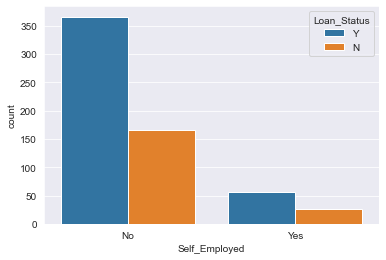

In [39]:
sns.countplot('Self_Employed',hue='Loan_Status',data=df)

In [40]:
df.groupby('Self_Employed')['Loan_Status'].value_counts()

Self_Employed  Loan_Status
No             Y              366
               N              166
Yes            Y               56
               N               26
Name: Loan_Status, dtype: int64

#### Self-Employment and Loan Status Observation

Analyzing the distribution of loan status based on self-employment status, we make the following important observation:

```Not Self-Employed:``` Among applicants who are not self-employed, 366 loans have been approved ('Y'), while 166 loans have been rejected ('N'). This indicates a higher approval rate for non-self-employed applicants.

```Self-Employed:``` Among self-employed applicants, 56 loans have been approved, and 26 loans have been rejected.

This observation suggests that individuals who are not self-employed tend to have a higher loan approval rate compared to self-employed applicants. The data indicates that self-employment status may influence loan approval decisions.

Further analysis could explore the potential reasons behind the difference in loan approval rates between self-employed and non-self-employed applicants, considering factors such as income stability, credit history, and risk assessment.

This analysis highlights the impact of self-employment status on loan approval outcomes and underscores the importance of understanding how various applicant characteristics can affect lending decisions.

#### ApplicantIncome

In [41]:
df['ApplicantIncome'].value_counts()

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

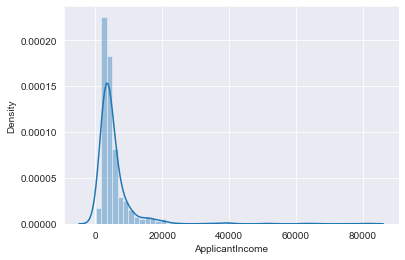

In [42]:
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

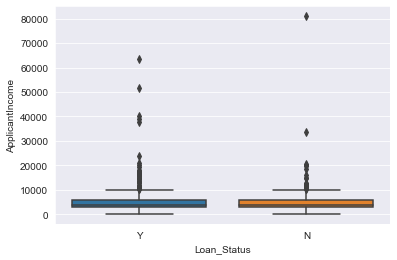

In [43]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)


<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

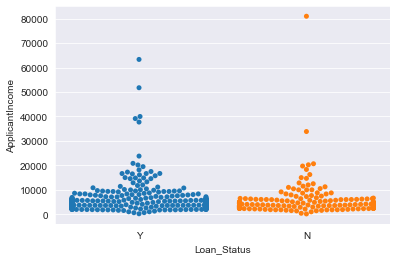

In [44]:
sns.swarmplot(x='Loan_Status', y='ApplicantIncome', data=df)


### CoapplicantIncome

In [45]:
df['CoapplicantIncome'].value_counts()

0       273
2500      5
2083      5
1666      5
2250      3
       ... 
2791      1
1010      1
1695      1
2598      1
240       1
Name: CoapplicantIncome, Length: 287, dtype: int64

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

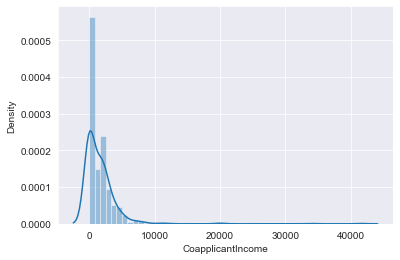

In [46]:
sns.distplot(df['CoapplicantIncome'])

CoapplicantIncome column is Right skewed

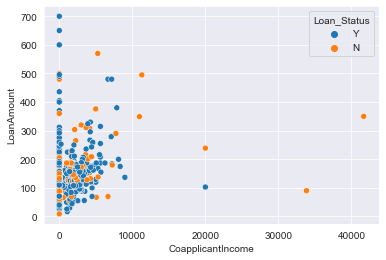

In [47]:
sns.scatterplot(x = "CoapplicantIncome", y= "LoanAmount", data=df,hue="Loan_Status");

### LoanAmount

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

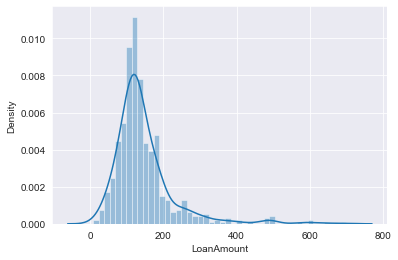

In [48]:
sns.distplot(df['LoanAmount'])

LoanAmount is also right skewed

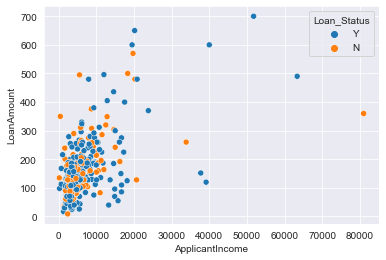

In [49]:
sns.scatterplot(x = "ApplicantIncome", y= "LoanAmount", data=df,hue="Loan_Status");

when ApplicantIncome is increse the LoanAmount is also incresed and chance of loan approvel is greater

### Loan_Amount_Term

In [50]:
df['Loan_Amount_Term'].value_counts()

360    526
180     44
480     15
300     13
240      4
84       4
120      3
60       2
36       2
12       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

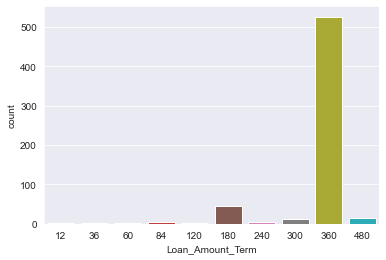

In [51]:
sns.countplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

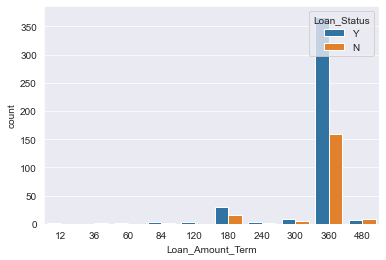

In [52]:
sns.countplot(x='Loan_Amount_Term', hue='Loan_Status', data=df)


### Credit_History

In [53]:
df['Credit_History'].value_counts()

1    525
0     89
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

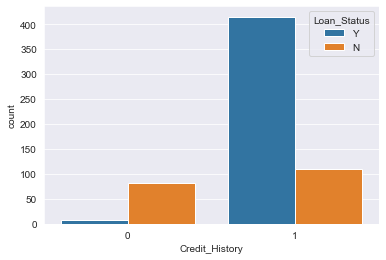

In [54]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)

In [55]:
df.groupby('Credit_History')['Loan_Status'].value_counts()

Credit_History  Loan_Status
0               N               82
                Y                7
1               Y              415
                N              110
Name: Loan_Status, dtype: int64

##### Credit History and Loan Status Observation:

Analyzing the distribution of loan status based on credit history, we make the following important observation:

```Applicants with No Credit History (Credit_History = 0):``` Among applicants with no credit history, only 7 loans have been approved ('Y'), while 82 loans have been rejected ('N'). This indicates a significantly lower approval rate for applicants with no credit history.

```Applicants with Good Credit History (Credit_History = 1):``` Among applicants with good credit history, 415 loans have been approved, and 110 loans have been rejected.

This observation emphasizes the substantial impact of credit history on loan approval decisions. Having a good credit history (Credit_History = 1) is strongly associated with a higher likelihood of loan approval, while applicants with no credit history (Credit_History = 0) face greater challenges in obtaining loan approvals.

The analysis underscores the critical role that credit history plays in influencing lending decisions and highlights its significance as a predictive factor for loan approval.

### Property_Area

In [56]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

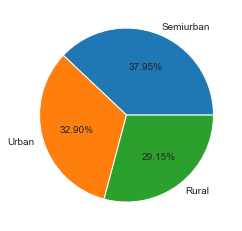

In [57]:
plt.pie(df['Property_Area'].value_counts().values,labels=df['Property_Area'].value_counts().index,autopct='%1.2f%%');

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

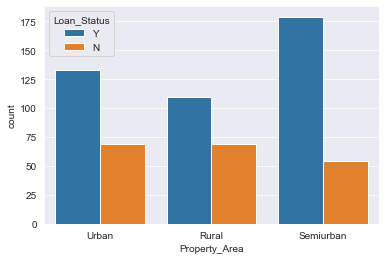

In [58]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)

In [59]:
df.groupby('Property_Area')['Loan_Status'].value_counts()

Property_Area  Loan_Status
Rural          Y              110
               N               69
Semiurban      Y              179
               N               54
Urban          Y              133
               N               69
Name: Loan_Status, dtype: int64

##### Property Area and Loan Status Observation:

Analyzing the distribution of loan status based on property area, we make the following important observation:

```Rural Property Area:``` Among applicants from rural property areas, 110 loans have been approved ('Y'), while 69 loans have been rejected ('N'). This indicates a higher approval rate for loan applicants residing in rural areas.

```Semiurban Property Area:``` Among applicants from semiurban property areas, 179 loans have been approved, and 54 loans have been rejected.

```Urban Property Area:``` Among applicants from urban property areas, 133 loans have been approved, and 69 loans have been rejected.

This observation suggests that loan applicants from rural property areas tend to have a higher loan approval rate compared to those from semiurban and urban areas. It implies that the property area might influence loan approval decisions, potentially due to economic and demographic differences among these areas.

Further analysis could explore the reasons behind these variations in loan approval rates based on property area and investigate the socioeconomic factors contributing to these disparities.

In [60]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Loan_Status

In [61]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

This is out target column and this is loooking imbalanced

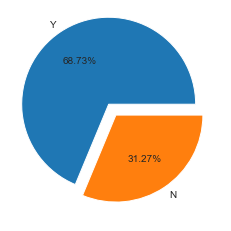

In [62]:
plt.pie(df['Loan_Status'].value_counts().values,labels=df['Loan_Status'].value_counts().index,autopct='%1.2f%%',explode=(.15,0));

### Separating Numerical And Categorical Columns

In [63]:
numerical_columns = df.select_dtypes(include='number').columns
categorical_columns = df.select_dtypes(include='object').columns

In [64]:
numerical_columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [65]:
categorical_columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

### Distribution plot for Seeing Data Distribution

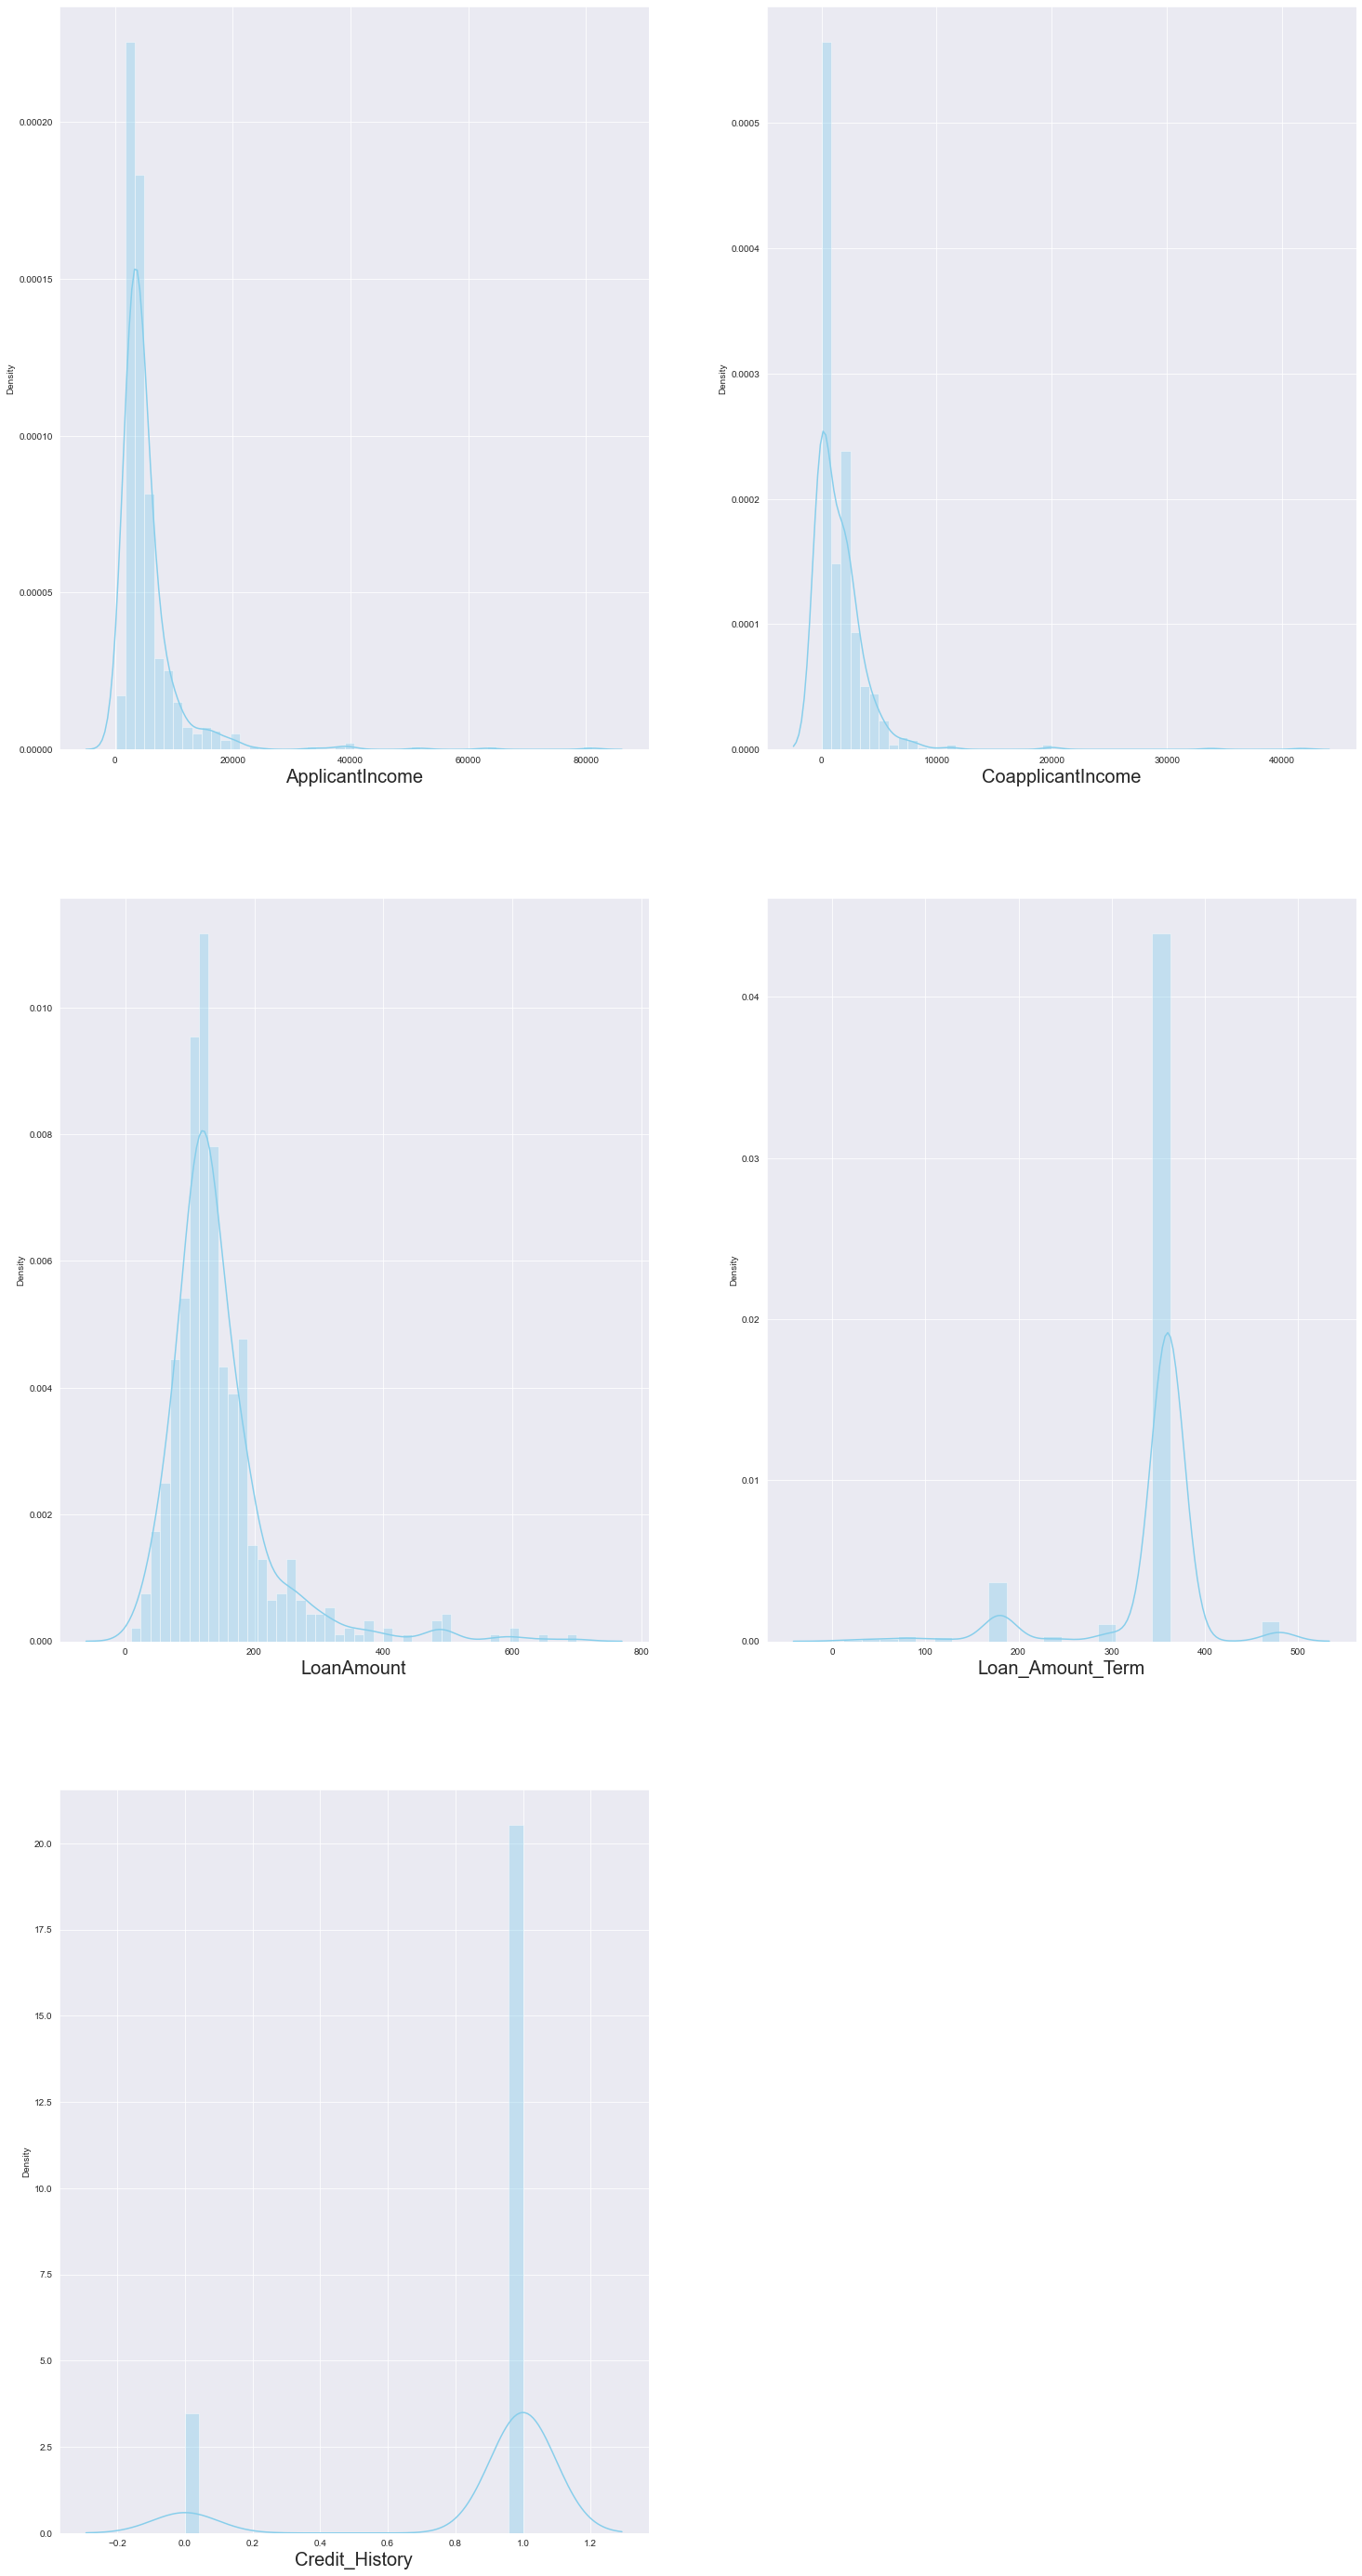

In [66]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in numerical_columns:
    if plotnumber <=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)

    plotnumber +=1
plt.show()

### BoxPlot for seeing Outliers

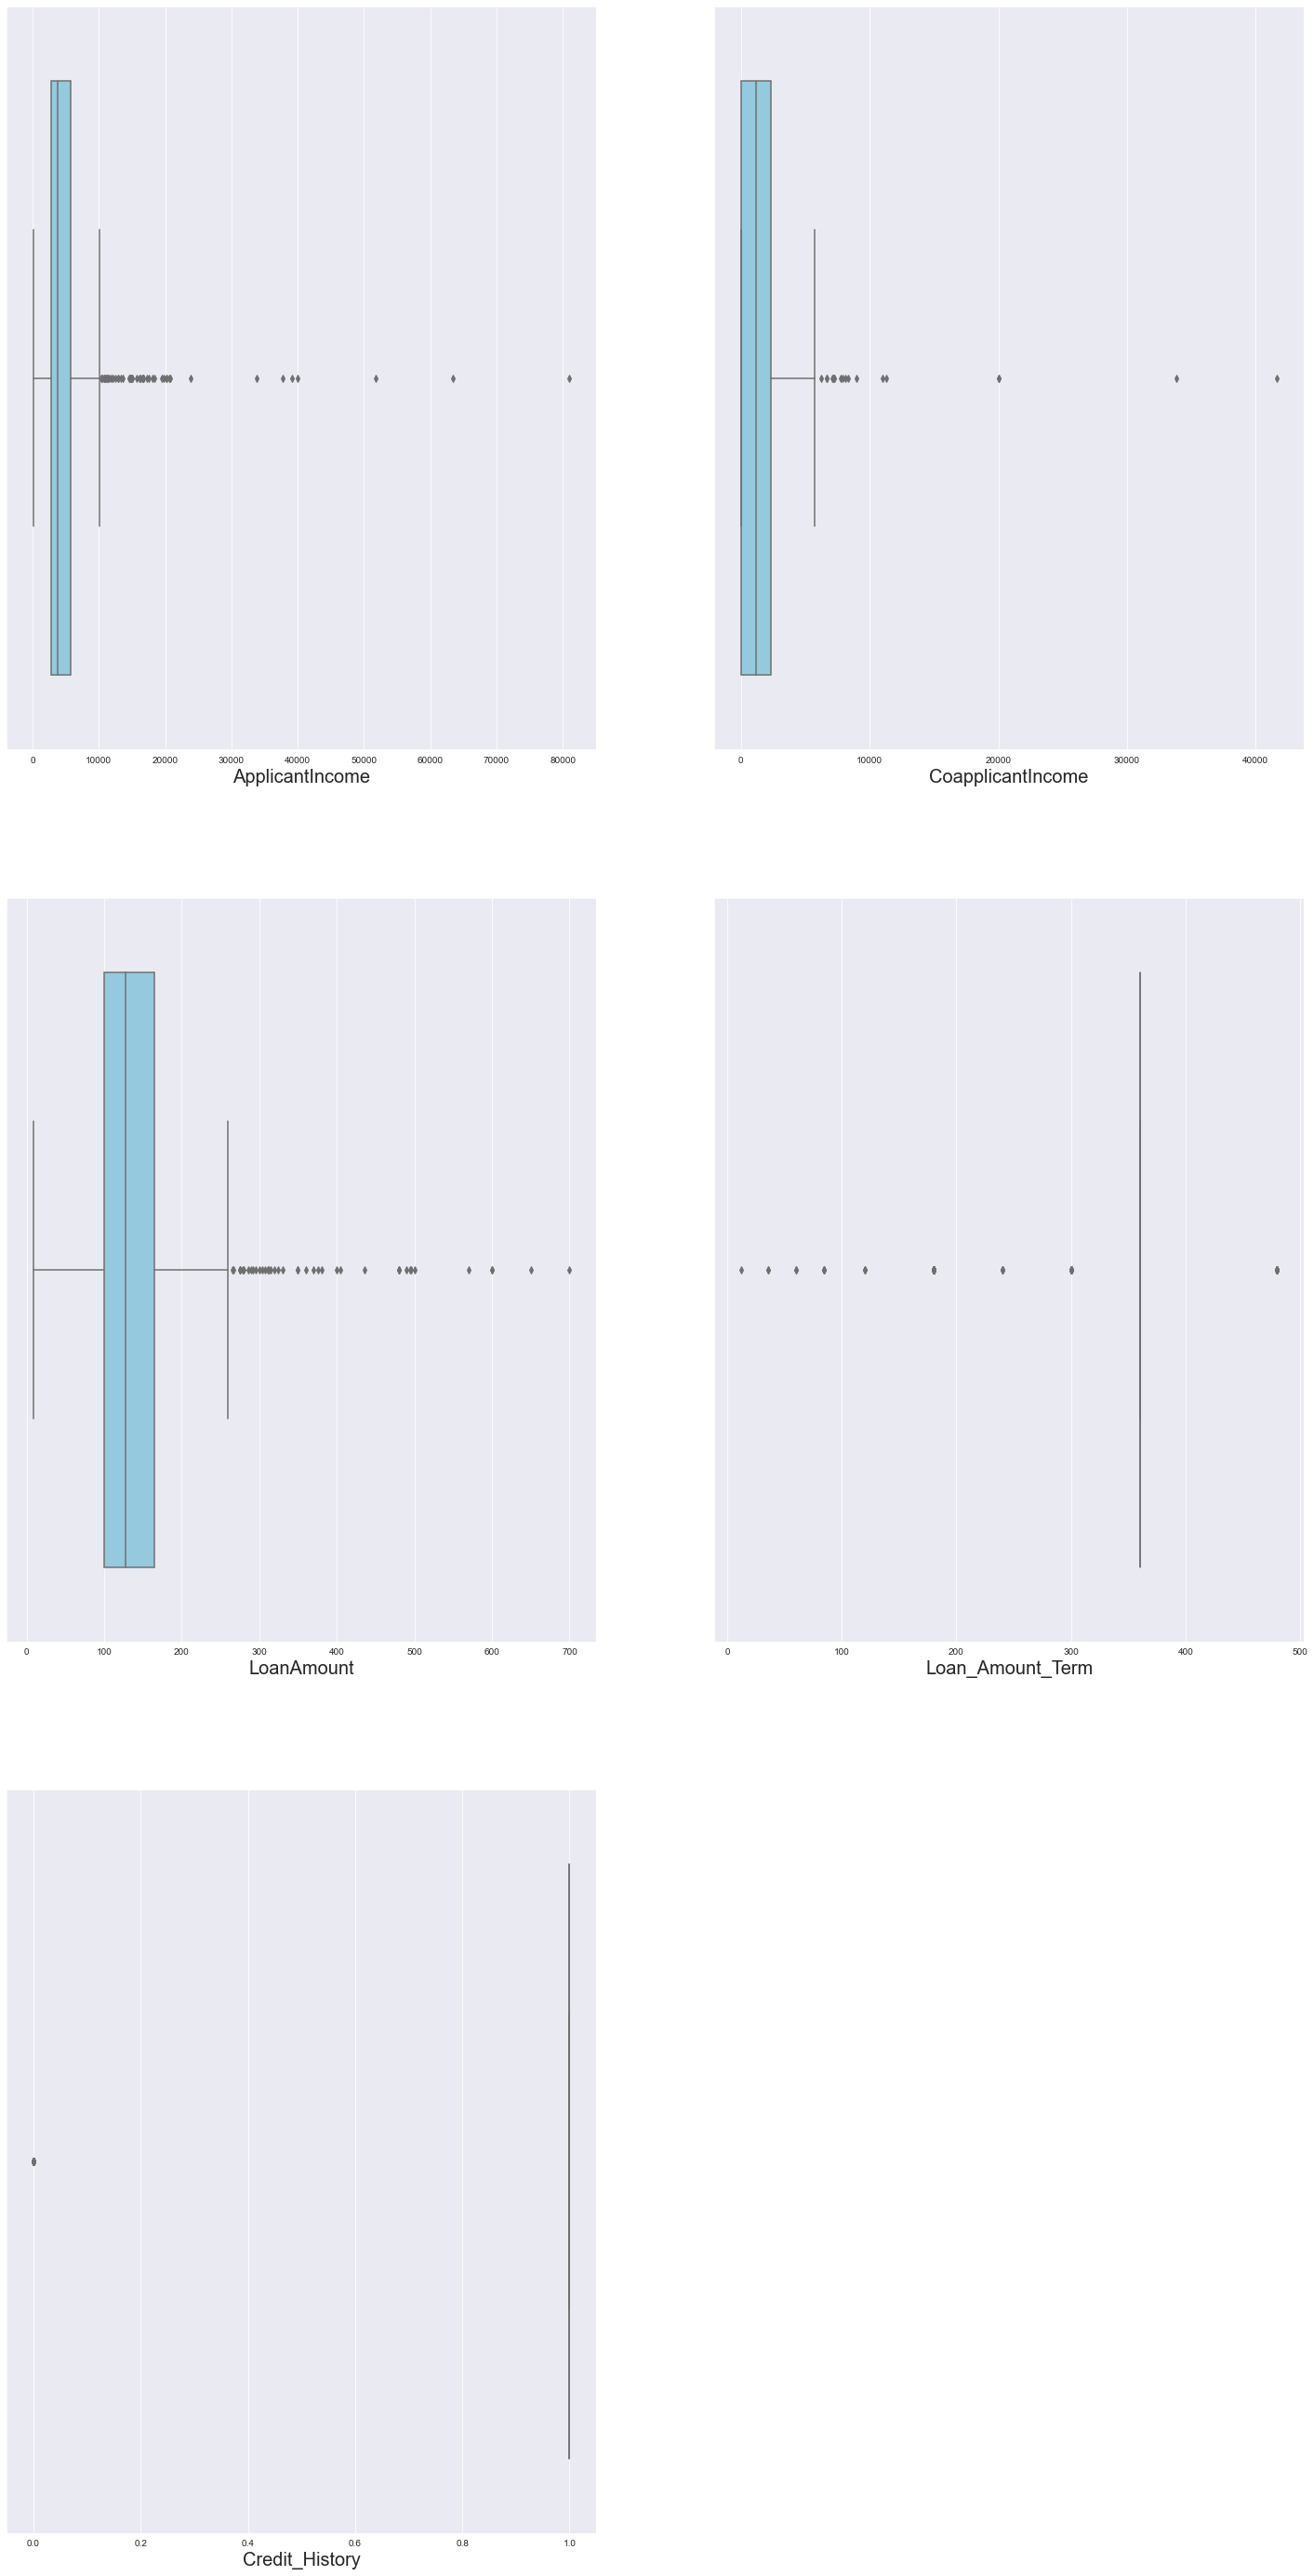

In [67]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in numerical_columns:
    if plotnumber <=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.boxplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)

    plotnumber +=1
plt.show()

The  outliers are present in every column

### Multivariate Analysis

### Pair plot

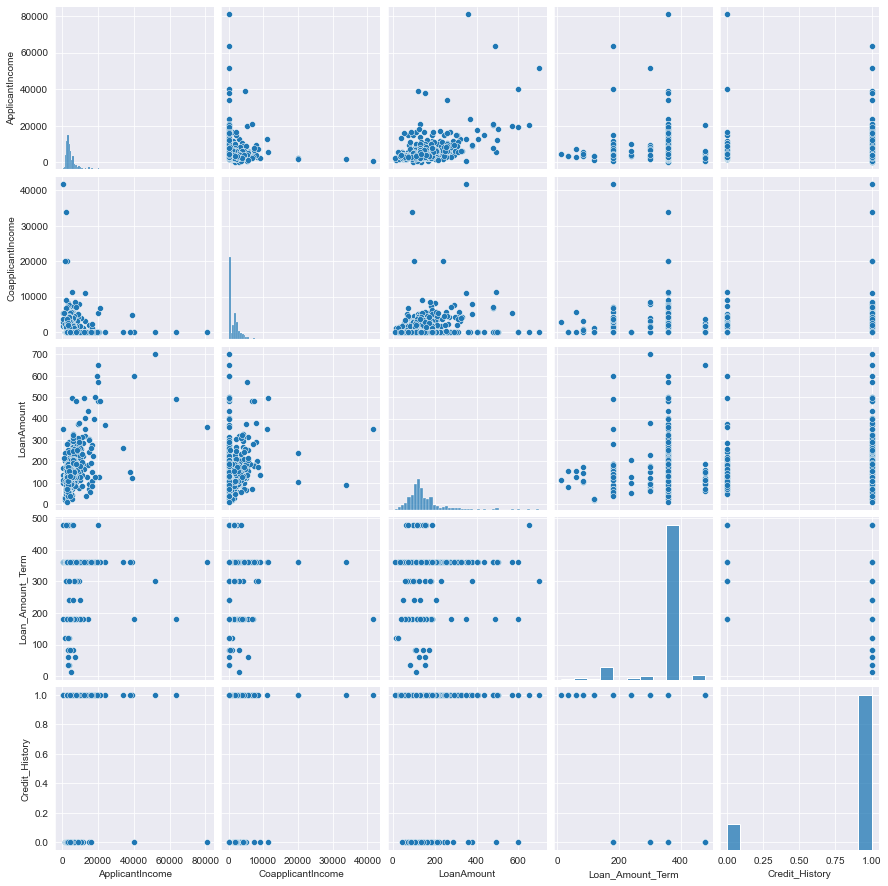

In [68]:
sns.pairplot(df)

there are some columns have strong linear correlation

### Cleaning Data

#### 1.Encoding the categorical columns using Label Encoding

In [69]:
categorical_col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status']

In [70]:
LE = LabelEncoder()
df[categorical_col]=df[categorical_col].apply(LE.fit_transform)

In [71]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0,128,360,1,2,1
1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,1,1,0,0,1,3000,0,66,360,1,2,1
3,1,1,0,1,0,2583,2358,120,360,1,2,1
4,1,0,0,0,0,6000,0,141,360,1,2,1


#### 2.Handling Outliers

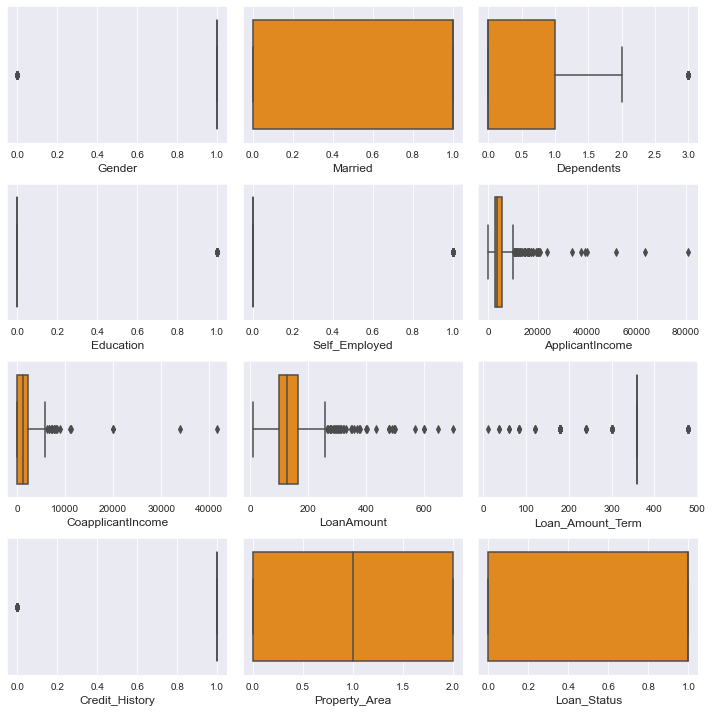

In [72]:
# indentifying the outlierspresent in numerical columns using boxplot

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in df.columns:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column],color='darkorange')
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

#### Handling Outliers By Z score

In [73]:
clolumns_to_be_handle = df[["ApplicantIncome","CoapplicantIncome","LoanAmount"]]

In [74]:
z=np.abs(zscore(clolumns_to_be_handle))
z

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.072991,0.554487,0.211241
1,0.134412,0.038731,0.211241
2,0.393747,0.554487,0.948996
3,0.462062,0.251980,0.306435
4,0.097728,0.554487,0.056551
...,...,...,...
609,0.410130,0.554487,0.889500
610,0.212557,0.554487,1.258378
611,0.437174,0.472404,1.276168
612,0.357064,0.554487,0.490816


In [75]:
df= df[(z<3).all(axis=1)]
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0,128,360,1,2,1
1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,1,1,0,0,1,3000,0,66,360,1,2,1
3,1,1,0,1,0,2583,2358,120,360,1,2,1
4,1,0,0,0,0,6000,0,141,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0,71,360,1,0,1
610,1,1,3,0,0,4106,0,40,180,1,0,1
611,1,1,1,0,0,8072,240,253,360,1,2,1
612,1,1,2,0,0,7583,0,187,360,1,2,1


#### Heat Map

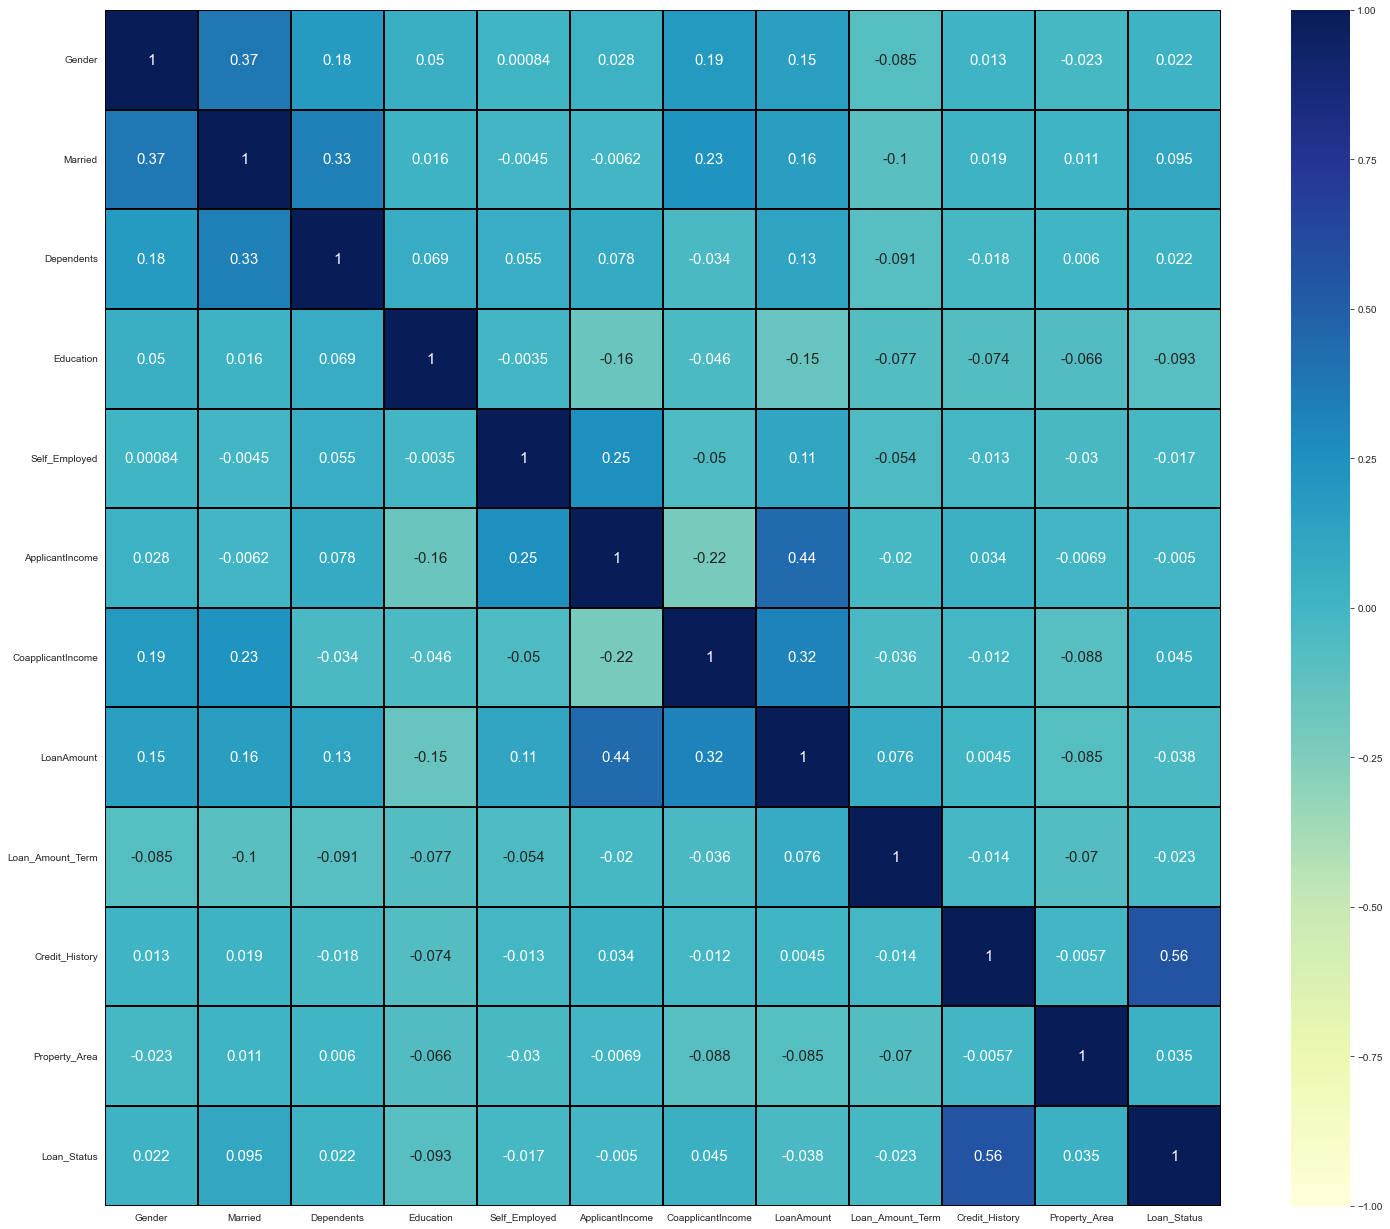

In [76]:
plt.figure(figsize=(25,22))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor='black',annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

#### 3.Checking Correlation with Target Column

In [77]:
#correlation with target column
correlation_with_quality = df.corr()['Loan_Status'].abs().sort_values(ascending=False)
print(correlation_with_quality)

Loan_Status          1.000000
Credit_History       0.555908
Married              0.095124
Education            0.092852
CoapplicantIncome    0.044815
LoanAmount           0.037704
Property_Area        0.034894
Loan_Amount_Term     0.023119
Gender               0.021942
Dependents           0.021937
Self_Employed        0.016617
ApplicantIncome      0.005043
Name: Loan_Status, dtype: float64


We can observe that ```"ApplicantIncome"``` and ```"Self_Employed"``` are relatively weakly correlated with the label, indicating that they may have limited contribution to the prediction. But i am not deleting ```"ApplicantIncome"``` 

In [78]:
# dropping irrelevant columns
df.drop('Self_Employed',axis=1,inplace=True)

### 5.Checking Correlation between columns to columns

In [79]:
#schecking correlation
df_corr = df.corr()
df_corr

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.374745,0.184580,0.050036,0.027728,0.190220,0.150043,-0.084919,0.013432,-0.022807,0.021942
Married,0.374745,1.000000,0.333887,0.015846,-0.006164,0.229955,0.159808,-0.100776,0.019377,0.010586,0.095124
Dependents,0.184580,0.333887,1.000000,0.068588,0.078305,-0.033735,0.132766,-0.091158,-0.017650,0.006005,0.021937
Education,0.050036,0.015846,0.068588,1.000000,-0.160966,-0.045700,-0.151997,-0.076546,-0.073799,-0.065623,-0.092852
ApplicantIncome,0.027728,-0.006164,0.078305,-0.160966,1.000000,-0.218845,0.440055,-0.020069,0.034203,-0.006917,-0.005043
CoapplicantIncome,0.190220,0.229955,-0.033735,-0.045700,-0.218845,1.000000,0.315174,-0.036140,-0.012245,-0.087736,0.044815
LoanAmount,0.150043,0.159808,0.132766,-0.151997,0.440055,0.315174,1.000000,0.075801,0.004538,-0.084519,-0.037704
Loan_Amount_Term,-0.084919,-0.100776,-0.091158,-0.076546,-0.020069,-0.036140,0.075801,1.000000,-0.013960,-0.070405,-0.023119
Credit_History,0.013432,0.019377,-0.017650,-0.073799,0.034203,-0.012245,0.004538,-0.013960,1.000000,-0.005694,0.555908
Property_Area,-0.022807,0.010586,0.006005,-0.065623,-0.006917,-0.087736,-0.084519,-0.070405,-0.005694,1.000000,0.034894


#### We are writing this function to see those columns which are highly correlated with each other

In [80]:
correlation_threshold = 0.80
mask = df_corr.abs() >= correlation_threshold
features_to_drop = set()
for i in range(len(df_corr.columns)):
    for j in range(i+1, len(df_corr.columns)):
        if mask.iloc[i, j]:
            colname_i = df_corr.columns[i]
            colname_j = df_corr.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)

In [81]:
features_to_drop

set()

### VIF

In [82]:
df1=df.copy()

In [83]:
#drop target column
df1.drop('Loan_Status',axis=1, inplace=True)

In [84]:
#scaling data
sc=StandardScaler()
standard=sc.fit_transform(df1)

In [85]:
standard=pd.DataFrame(standard, columns=df1.columns)

In [86]:
VIF= pd.DataFrame()
VIF['features']= standard.columns
VIF['vif']=[variance_inflation_factor(standard.values,i) for i in range(len(standard.columns))]
VIF

,features,vif
0,Gender,1.199834
1,Married,1.333581
2,Dependents,1.180797
3,Education,1.068072
4,ApplicantIncome,1.544754
5,CoapplicantIncome,1.454572
6,LoanAmount,1.671860
7,Loan_Amount_Term,1.049694
8,Credit_History,1.008178
9,Property_Area,1.025179


There is no Multicollinearty we are good to go For Prediction

### Splitting into Feature and Target column

In [87]:
X= df.drop('Loan_Status', axis=1)
Y=df['Loan_Status']

### removing Skewness

In [88]:
X.skew()

Gender              -1.626104
Married             -0.631755
Dependents           1.038787
Education            1.303332
ApplicantIncome      2.164762
CoapplicantIncome    1.353192
LoanAmount           1.114173
Loan_Amount_Term    -2.446026
Credit_History      -2.010069
Property_Area       -0.063183
dtype: float64

##### Transformed by Power Transformer

In [89]:
skew=["ApplicantIncome","CoapplicantIncome","LoanAmount"]

In [90]:
transformed=power_transform(X[skew].values)

In [91]:
pd.DataFrame(transformed).skew()

0    0.028063
1   -0.186188
2    0.061412
dtype: float64

### Standardization

In [92]:
sc=StandardScaler()

In [93]:
X=sc.fit_transform(transformed)

### Data Balancing

In [94]:
sm=SMOTE()

In [95]:
x,y=sm.fit_resample(X,Y)

In [96]:
x.shape , y.shape

((814, 3), (814,))

### Model Training

#### Find best Randomstate

In [97]:
maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.6196319018404908 on Random State = 130


In [98]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=maxRS)

#### Defining All Classification Models

In [99]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
SGD_model= SGDClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,SGD_model,ADA_model,GB_model ]

In [100]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*30)

Accuracy_Score of  LogisticRegression() is 61.963190184049076
Confusion Matrix of  LogisticRegression()  is 
 [[49 35]
 [27 52]]
              precision    recall  f1-score   support

           0       0.64      0.58      0.61        84
           1       0.60      0.66      0.63        79

    accuracy                           0.62       163
   macro avg       0.62      0.62      0.62       163
weighted avg       0.62      0.62      0.62       163

******************************
Accuracy_Score of  RidgeClassifier() is 61.963190184049076
Confusion Matrix of  RidgeClassifier()  is 
 [[49 35]
 [27 52]]
              precision    recall  f1-score   support

           0       0.64      0.58      0.61        84
           1       0.60      0.66      0.63        79

    accuracy                           0.62       163
   macro avg       0.62      0.62      0.62       163
weighted avg       0.62      0.62      0.62       163

******************************
Accuracy_Score of  DecisionTreeC

### CrossValidation

In [101]:
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,x,y,cv=5, scoring='accuracy').mean()*100)
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 61.963190184049076
cross Validation accuracy score of  LogisticRegression()  is  54.05059456184201
**************************************************
Accuracy_Score of  RidgeClassifier() is 61.963190184049076
cross Validation accuracy score of  RidgeClassifier()  is  53.927137771718556
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 65.6441717791411
cross Validation accuracy score of  DecisionTreeClassifier()  is  62.28811633719609
**************************************************
Accuracy_Score of  SVC() is 68.09815950920245
cross Validation accuracy score of  SVC()  is  57.97773233356056
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 64.41717791411043
cross Validation accuracy score of  KNeighborsClassifier()  is  64.3770355222298
**************************************************
Accuracy_Score of  RandomForestClassifier() is 73.6196319018404

**RandomForestClassifier gave best accuracy score and minimum difference for generalise model**

#### Hyperparameter tuning on RandomForestClassifier

In [103]:
n_estimator= [200,600,1000] 
max_features= ['auto','sqrt']  
max_depth=[10,118,282]  
min_samples_split= [2,3] 
min_samples_leaf= [1,4,7] 

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [200, 600, 1000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 118, 282],
 'min_samples_split': [2, 3],
 'min_samples_leaf': [1, 4, 7]}

In [104]:
grid_search=GridSearchCV(estimator=RFR_model,param_grid=param_grid,cv=3,n_jobs=-1,verbose=1)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 118, 282],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4, 7],
                         'min_samples_split': [2, 3],
                         'n_estimators': [200, 600, 1000]},
             verbose=1)

In [105]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=282, max_features='sqrt', n_estimators=1000)

In [106]:
grid_search.best_params_

{'max_depth': 282,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [107]:
GCV_pred=grid_search.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.7055214723926381

**After applying hypermetertuning RandomForestClassifier is giving 70% accuracy**

#### RUC AOC Curve/Plot

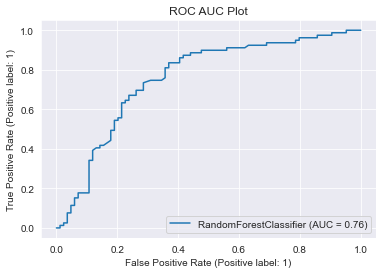

In [108]:
plot_roc_curve(grid_search.best_estimator_,x_test,y_test)
plt.title('ROC AUC Plot')
plt.show()

#### Confusion matrix

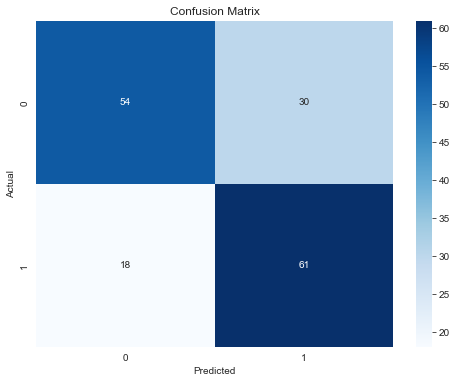

In [109]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
y_pred = grid_search.best_estimator_.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Saving the Model

In [110]:
joblib.dump(grid_search.best_estimator_,"Loan_prediction.pkl")

['Loan_prediction.pkl']

# PROJECT COMPLETED

##### Submitted By: Amit Kumar